<a href="https://colab.research.google.com/github/leesh1005/mining2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EC%83%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###데이터전처리


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 8.7 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=e47163f664d3315d1c4842203e39b2aa6117d2cd3d8e30c66a89f8d620f9572d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns          
import matplotlib.pyplot as plt 

In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/헬스.csv", index_col='가입자일련번호')

In [144]:
%matplotlib inline
import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm   

mpl.rcParams['axes.unicode_minus'] = False  


path ='/content/drive/My Drive/Colab Notebooks/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
df=health

In [ ]:
df.drop('Unnamed: 30', axis=1, inplace=True)
df.drop('구강검진수검여부', axis=1, inplace=True)
df.drop('치아우식증유무', axis=1, inplace=True)
df.drop('치석', axis=1, inplace=True)
df.drop('기준년도', axis=1, inplace=True)

In [ ]:
#bmi 변수 추가
df['bmi']=df['체중']/((df['신장']/100)*(df['신장']/100))


In [ ]:
health['비만 여부']=0

health.loc[health['bmi']<25, '비만 여부']='0'
health.loc[health['bmi']>=25, '비만 여부']='1'


In [ ]:
display(df)

,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi,비만 여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,36,0,9,165,60,72.1,1.2,1.5,1,1,...,15.0,1.0,1.1,21.0,27.0,21.0,0.0,0.0,22.038567,0
2,27,1,13,150,65,81.0,0.8,0.8,1,1,...,12.7,1.0,0.5,18.0,15.0,15.0,0.0,0.0,28.888889,1
3,11,1,12,155,55,70.0,0.6,0.7,1,1,...,12.8,1.0,0.7,27.0,25.0,7.0,0.0,0.0,22.892820,0
4,31,0,13,160,70,90.8,1.0,1.0,1,2,...,16.4,1.0,1.2,65.0,97.0,72.0,0.0,0.0,27.343750,1
5,41,1,12,155,50,75.2,1.5,1.2,1,1,...,12.4,1.0,0.7,18.0,17.0,14.0,0.0,0.0,20.811655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,44,1,13,155,55,83.0,1.2,1.2,1,1,...,13.7,1.0,0.7,20.0,21.0,20.0,0.0,1.0,22.892820,0
9997,43,1,11,160,55,77.5,1.0,1.2,1,1,...,14.3,1.0,0.7,24.0,22.0,21.0,0.0,1.0,21.484375,0
9998,45,0,12,160,80,93.0,0.6,0.6,1,1,...,15.6,1.0,1.0,22.0,27.0,35.0,0.0,0.0,31.250000,1


In [ ]:
df.isnull()
df.isnull().sum()

시도               0
성별               0
연령대              0
신장               0
체중               0
허리둘레             0
시력(좌)            0
시력(우)            0
청력(좌)            0
청력(우)            0
수축기혈압           88
이완기혈압           88
식전혈당(공복혈당)      88
총콜레스테롤        5956
트리글리세라이드      5956
HDL콜레스테롤      5956
LDL콜레스테롤      6023
혈색소             88
요단백            139
혈청크레아티닌         88
(혈청지오티)AST      88
(혈청지오티)ALT      88
감마지티피           88
흡연상태             2
음주여부             1
bmi              0
비만 여부            0
dtype: int64

In [ ]:
df['총콜레스테롤']=df['총콜레스테롤'].fillna(df['총콜레스테롤'].mean())
df['트리글리세라이드']=df['트리글리세라이드'].fillna(df['트리글리세라이드'].mean())
df['HDL콜레스테롤']=df['HDL콜레스테롤'].fillna(df['HDL콜레스테롤'].mean())
df['LDL콜레스테롤']=df['LDL콜레스테롤'].fillna(df['LDL콜레스테롤'].mean())
df['혈색소']=df['혈색소'].fillna(df['혈색소'].mean())
df['요단백'].fillna(0, inplace=True)
df['수축기혈압']=df['수축기혈압'].fillna(df['수축기혈압'].mean())
df['이완기혈압']=df['이완기혈압'].fillna(df['이완기혈압'].mean())
df['식전혈당(공복혈당)']=df['식전혈당(공복혈당)'].fillna(df['식전혈당(공복혈당)'].mean())
df['혈청크레아티닌']=df['혈청크레아티닌'].fillna(df['혈청크레아티닌'].mean())
df['(혈청지오티)AST']=df['(혈청지오티)AST'].fillna(df['(혈청지오티)AST'].mean())
df['(혈청지오티)ALT']=df['(혈청지오티)ALT'].fillna(df['(혈청지오티)ALT'].mean())
df['감마지티피']=df['감마지티피'].fillna(df['감마지티피'].mean())

In [ ]:
df.dropna(axis=0)

,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi,비만 여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,36,0,9,165,60,72.1,1.2,1.5,1,1,...,15.0,1.0,1.1,21.0,27.0,21.0,0.0,0.0,22.038567,0
2,27,1,13,150,65,81.0,0.8,0.8,1,1,...,12.7,1.0,0.5,18.0,15.0,15.0,0.0,0.0,28.888889,1
3,11,1,12,155,55,70.0,0.6,0.7,1,1,...,12.8,1.0,0.7,27.0,25.0,7.0,0.0,0.0,22.892820,0
4,31,0,13,160,70,90.8,1.0,1.0,1,2,...,16.4,1.0,1.2,65.0,97.0,72.0,0.0,0.0,27.343750,1
5,41,1,12,155,50,75.2,1.5,1.2,1,1,...,12.4,1.0,0.7,18.0,17.0,14.0,0.0,0.0,20.811655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,44,1,13,155,55,83.0,1.2,1.2,1,1,...,13.7,1.0,0.7,20.0,21.0,20.0,0.0,1.0,22.892820,0
9997,43,1,11,160,55,77.5,1.0,1.2,1,1,...,14.3,1.0,0.7,24.0,22.0,21.0,0.0,1.0,21.484375,0
9998,45,0,12,160,80,93.0,0.6,0.6,1,1,...,15.6,1.0,1.0,22.0,27.0,35.0,0.0,0.0,31.250000,1


In [ ]:
df[(df['흡연상태'].isnull()) | (df['음주여부'].isnull())]

,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi,비만 여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
6824,41,0,11,170,65,85.0,1.2,0.3,1,1,...,14.6,1.0,0.9,19.0,20.0,11.0,NaN,1.0,22.491349,0
7097,11,1,14,150,55,85.0,0.1,0.8,2,2,...,12.7,1.0,0.6,23.0,16.0,30.0,NaN,1.0,24.444444,0
9743,11,1,10,155,50,71.5,0.1,1.2,2,2,...,11.3,1.0,0.7,15.0,11.0,13.0,0.0,NaN,20.811655,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isna().sum())

시도            0
성별            0
연령대           0
신장            0
체중            0
허리둘레          0
시력(좌)         0
시력(우)         0
청력(좌)         0
청력(우)         0
수축기혈압         0
이완기혈압         0
식전혈당(공복혈당)    0
총콜레스테롤        0
트리글리세라이드      0
HDL콜레스테롤      0
LDL콜레스테롤      0
혈색소           0
요단백           0
혈청크레아티닌       0
(혈청지오티)AST    0
(혈청지오티)ALT    0
감마지티피         0
흡연상태          0
음주여부          0
bmi           0
비만 여부         0
dtype: int64


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 1 to 10000
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도          9997 non-null   float32
 1   성별          9997 non-null   float32
 2   연령대         9997 non-null   float32
 3   신장          9997 non-null   float32
 4   체중          9997 non-null   float32
 5   허리둘레        9997 non-null   float32
 6   시력(좌)       9997 non-null   float32
 7   시력(우)       9997 non-null   float32
 8   청력(좌)       9997 non-null   float32
 9   청력(우)       9997 non-null   float32
 10  수축기혈압       9997 non-null   float32
 11  이완기혈압       9997 non-null   float32
 12  식전혈당(공복혈당)  9997 non-null   float32
 13  총콜레스테롤      9997 non-null   float32
 14  트리글리세라이드    9997 non-null   float32
 15  HDL콜레스테롤    9997 non-null   float32
 16  LDL콜레스테롤    9997 non-null   float32
 17  혈색소         9997 non-null   float32
 18  요단백         9997 non-null   float32
 19  혈청크레아티닌     9997 non-null 

In [ ]:
df= df.astype(dtype='float32')

print(df.dtypes)

시도            float32
성별            float32
연령대           float32
신장            float32
체중            float32
허리둘레          float32
시력(좌)         float32
시력(우)         float32
청력(좌)         float32
청력(우)         float32
수축기혈압         float32
이완기혈압         float32
식전혈당(공복혈당)    float32
총콜레스테롤        float32
트리글리세라이드      float32
HDL콜레스테롤      float32
LDL콜레스테롤      float32
혈색소           float32
요단백           float32
혈청크레아티닌       float32
(혈청지오티)AST    float32
(혈청지오티)ALT    float32
감마지티피         float32
흡연상태          float32
음주여부          float32
bmi           float32
비만 여부         float32
dtype: object


0    6300
1    3697
Name: 비만 여부, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_te

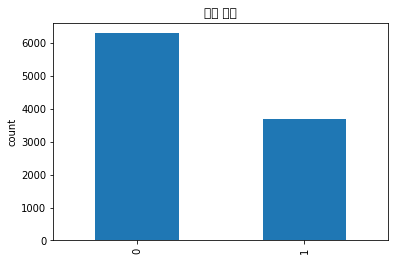

In [ ]:
print(health['비만 여부'].value_counts())

health['비만 여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('비만 여부')
plt.show()


In [ ]:
import mglearn

###의사결정나무 생성

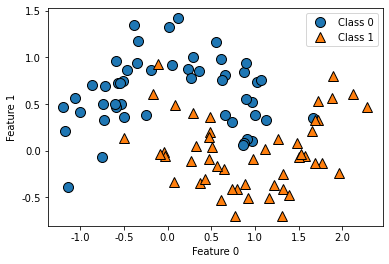

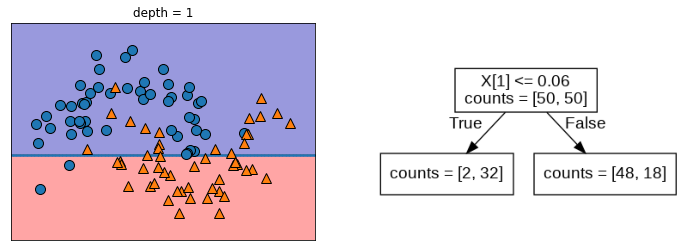

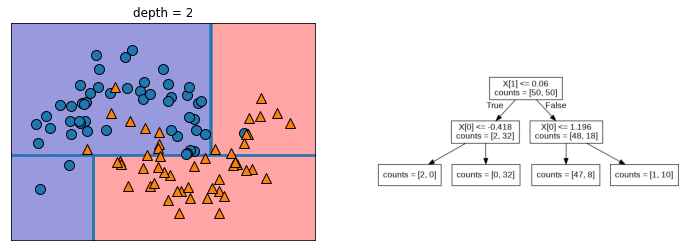

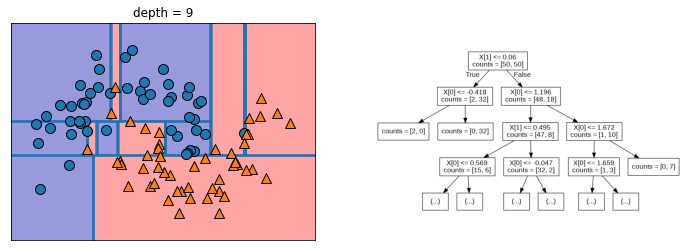

In [ ]:
mglearn.plots.plot_tree_progressive()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus 
import os


In [ ]:
import numpy as np
import pandas as pd


In [254]:
X=np.array(pd.DataFrame(health, columns=['성별', '연령대', '신장', '체중', '허리둘레', '흡연상태', '음주여부', '식전혈당(공복혈당)', '총콜레스테롤', '수축기혈압','이완기혈압', '혈청크레아티닌', '트리글리세라이드','HDL콜레스테롤', 'LDL콜레스테롤', '혈색소','요단백'
    , '(혈청지오티)ALT', '감마지티피']))


In [255]:
y = np.array(pd.DataFrame(health, columns=['비만 여부']))

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


In [257]:
X_train

array([[  0.,  11., 165., ...,   1.,  27.,  56.],
       [  1.,   9., 155., ...,   1.,   8.,  14.],
       [  1.,  13., 155., ...,   1.,  15.,   8.],
       ...,
       [  1.,  11., 160., ...,   1.,  24.,  32.],
       [  0.,  11., 170., ...,   1.,  17.,  26.],
       [  0.,   9., 165., ...,   1.,  20.,  26.]])

In [258]:
X_test

array([[  0.,  11., 165., ...,   1.,  21.,  44.],
       [  1.,   9., 150., ...,   1.,  10.,  10.],
       [  0.,  12., 160., ...,   1.,  14.,  11.],
       ...,
       [  1.,  16., 140., ...,   1.,  13.,  16.],
       [  1.,   9., 140., ...,   1.,  64.,  67.],
       [  0.,  12., 175., ...,   1.,  62., 164.]])

In [259]:
df['비만 여부']=pd.to_numeric(df['비만 여부'])

In [260]:
print(df.dtypes)

시도            float32
성별            float32
연령대           float32
신장            float32
체중            float32
허리둘레          float32
시력(좌)         float32
시력(우)         float32
청력(좌)         float32
청력(우)         float32
수축기혈압         float32
이완기혈압         float32
식전혈당(공복혈당)    float32
총콜레스테롤        float32
트리글리세라이드      float32
HDL콜레스테롤      float32
LDL콜레스테롤      float32
혈색소           float32
요단백           float32
혈청크레아티닌       float32
(혈청지오티)AST    float32
(혈청지오티)ALT    float32
감마지티피         float32
흡연상태          float32
음주여부          float32
bmi           float32
비만 여부         float32
dtype: object


In [262]:
y_train

array([['1'],
       ['0'],
       ['0'],
       ...,
       ['0'],
       ['1'],
       ['0']], dtype=object)

In [340]:
y_test

array([['0'],
       ['0'],
       ['1'],
       ...,
       ['0'],
       ['1'],
       ['1']], dtype=object)

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt_clf= DecisionTreeClassifier()


In [265]:
dt_clf=dt_clf.fit(X_train, y_train)

In [266]:
print("학습용 데이터 정확도: {:.3f}".format(dt_clf.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(dt_clf.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.994


In [280]:
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=0)
dt_clf.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(dt_clf.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(dt_clf.score(X_test, y_test)))

학습용 데이터 정확도: 0.946
시험용 데이터 정확도: 0.941


In [281]:
!pip uninstall graphiz

In [282]:
from sklearn.tree import export_graphviz
import graphviz

In [283]:
feature_names=health.columns.tolist()


In [284]:
feature_names = feature_names[0:19]

In [285]:
target_name=np.array(['N','Y'])


In [286]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [287]:
import graphviz
import mglearn

In [288]:
dt_dot_data =export_graphviz(dt_clf, out_file = "health.data",
                                  feature_names = feature_names,
                                  class_names = target_name)

with open("health.data") as f:
    dot_graph=f.read()

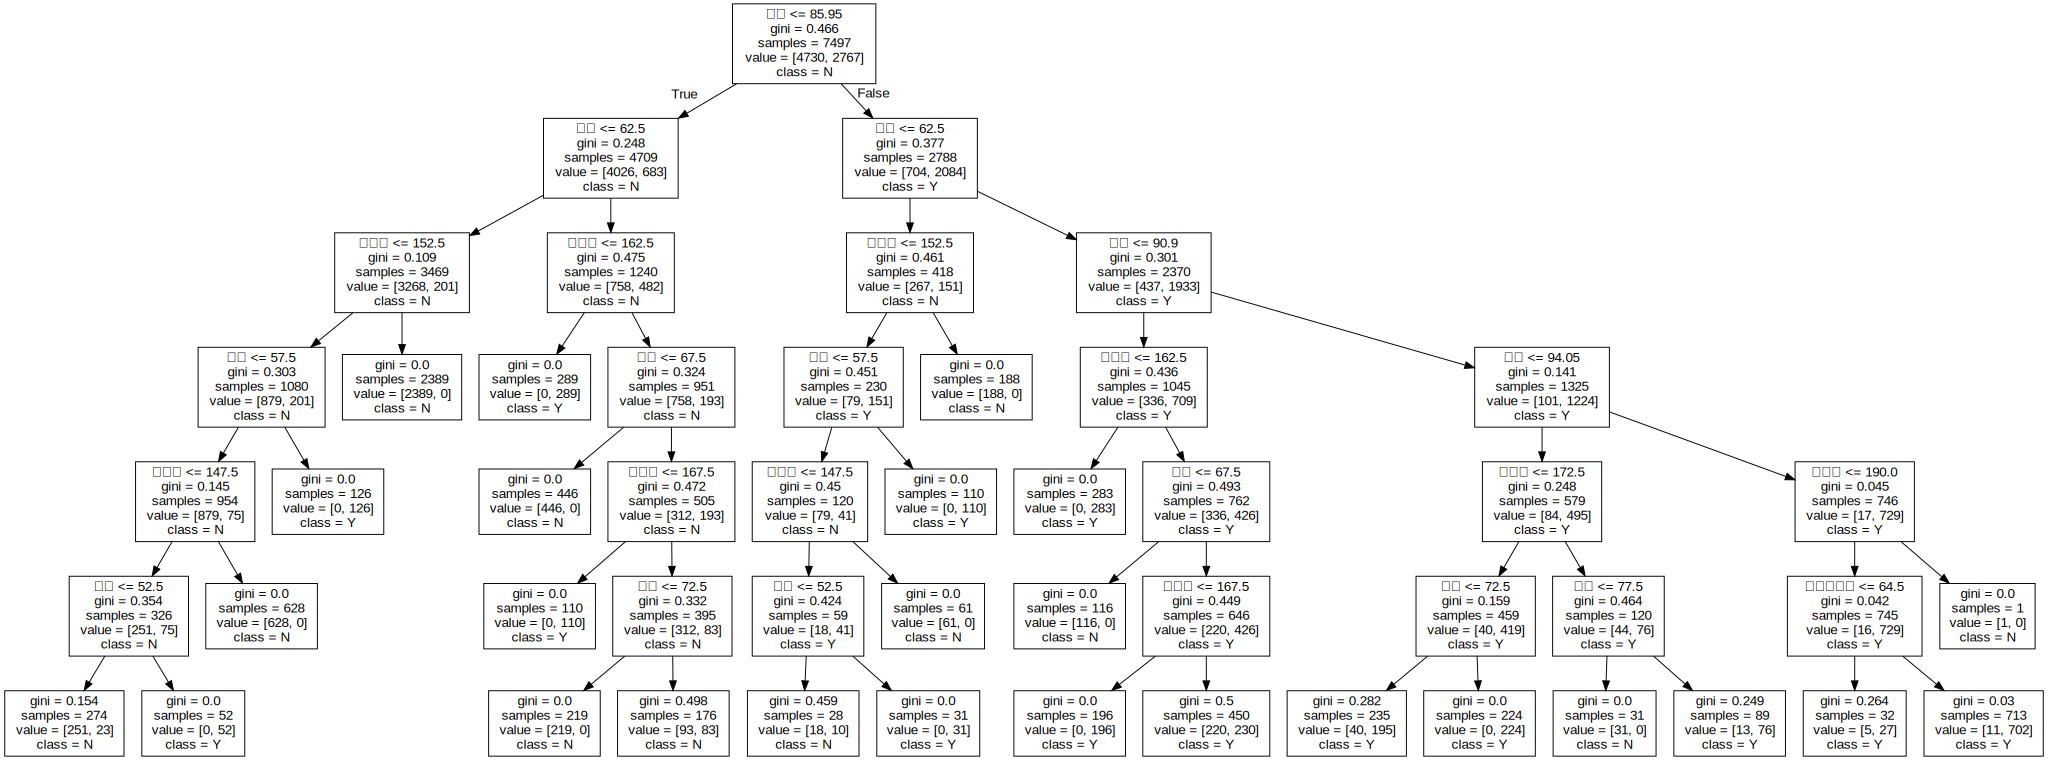

In [289]:
display(graphviz.Source(dot_graph))

###주요 변수들

In [290]:
result = dt_clf.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00000000e+00 0.00000000e+00 2.47453056e-01 3.02515698e-01
 4.49627061e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.04183990e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [293]:
res = pd.DataFrame(result)
res["feature"] = health.columns[0:19]
display(res.info())

display(res.sort_values(by='feature'))  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        19 non-null     float64
 1   feature  19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


None

,0,feature
15,0.000000,HDL콜레스테롤
16,0.000000,LDL콜레스테롤
1,0.000000,성별
10,0.000404,수축기혈압
0,0.000000,시도
7,0.000000,시력(우)
6,0.000000,시력(좌)
12,0.000000,식전혈당(공복혈당)
3,0.302516,신장
2,0.247453,연령대


###앙상블 모델





**랜덤 포레스트**

In [213]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

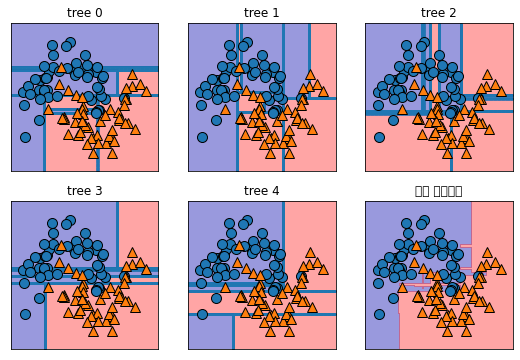

In [217]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [302]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.976


In [303]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy
Decision tree:  [0.90133333 0.86       0.87466667 0.868      0.86       0.93733333
 0.872      0.86915888 0.91188251 0.89452603]
Random forest:  [0.97066667 0.97333333 0.984      0.98266667 0.96933333 0.97066667
 0.976      0.98531375 0.97730307 0.96662216]
Accuracy mean
Decision tree :0.885
Random forest :0.976


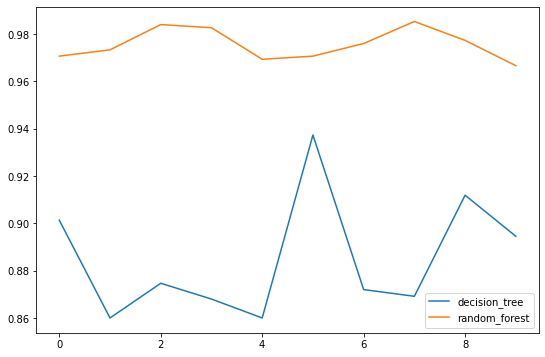

In [304]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

**그래디언트 부스팅**

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [306]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.999


In [435]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.996


In [436]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.928
시험용 데이터 세트 정확도: 0.924


####분류 모델 평가

**교차검증**

In [410]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy
Decision tree:  [0.90133333 0.86       0.87466667 0.868      0.86       0.93733333
 0.872      0.86915888 0.91188251 0.89452603]
Random forest:  [0.97066667 0.97333333 0.984      0.98266667 0.96933333 0.97066667
 0.976      0.98531375 0.97730307 0.96662216]
Gradient boosting:  [0.92       0.92133333 0.932      0.93866667 0.92533333 0.92
 0.91866667 0.92656876 0.92523364 0.92790387]
Accuracy mean
Decision tree :0.885
Random forest :0.976
Gradient boosting :0.926


In [411]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy mean -- StratifiedKFold 이용
Decision tree :0.885
Random forest :0.976
Gradient boosting :0.926


**그리드 서치**

In [441]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.02, 0.03, 0.01]}

In [442]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.02, 0.03, 0.01],
                         'max_depth': [1, 2, 3]})


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.02, 'max_depth': 1}",0.830199,8,0.835934,0.825130,0.829532
1,"{'learning_rate': 0.02, 'max_depth': 2}",0.916633,5,0.929972,0.899160,0.920768
2,"{'learning_rate': 0.02, 'max_depth': 3}",0.968921,2,0.974790,0.969988,0.961985
3,"{'learning_rate': 0.03, 'max_depth': 1}",0.838202,7,0.839936,0.838335,0.836335
4,"{'learning_rate': 0.03, 'max_depth': 2}",0.955049,3,0.956783,0.950380,0.957983
5,"{'learning_rate': 0.03, 'max_depth': 3}",0.983727,1,0.981593,0.984794,0.984794
6,"{'learning_rate': 0.01, 'max_depth': 1}",0.825797,9,0.837535,0.811525,0.828331
7,"{'learning_rate': 0.01, 'max_depth': 2}",0.851541,6,0.869148,0.827931,0.857543
8,"{'learning_rate': 0.01, 'max_depth': 3}",0.927171,4,0.932373,0.924370,0.924770


In [443]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.03, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.9837


In [444]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.988


###모델 평가 지표

In [445]:
from numpy import ndarray

In [447]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 



dt_pred = dt_clf.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.941
[[1466  104]
 [  44  886]]
Random forest 시험용 데이터 세트 정확도:0.976
[[1538   32]
 [  29  901]]
Gradient boosting 시험용 데이터 세트 정확도:0.988
[[1556   14]
 [  17  913]]


In [448]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_gbrt_pred, average='binary', pos_label="1")))  # pos_label = 1 기본값
print('TP (913) / TP+FP (927) = {:.3f}'.format(913/927))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_gbrt_pred, average='binary', pos_label="1")))
print('TP (913) / TP+FN (930) = {:.3f}'.format(913/930))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_gbrt_pred, average='binary', pos_label="1")))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.984*0.981/(0.984+0.981)))

정밀도:0.985
TP (913) / TP+FP (927) = 0.985
재현율:0.982
TP (913) / TP+FN (930) = 0.982
f1-measure:0.983
2*(정밀도*재현율)/(정밀도+재현율) = 0.982


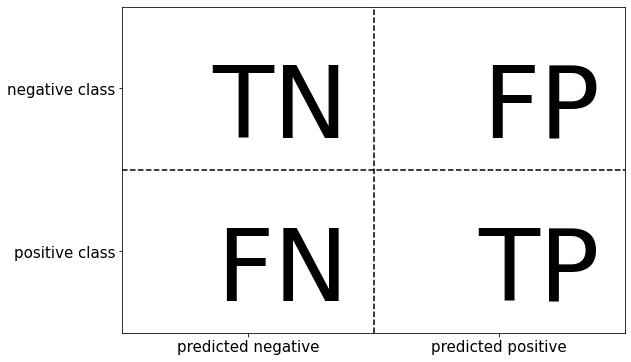

In [449]:
mglearn.plots.plot_binary_confusion_matrix()

In [450]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["N", "Y"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["N", "Y"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["N", "Y"]))

Decision Tree:
              precision    recall  f1-score   support

           N       0.97      0.93      0.95      1570
           Y       0.89      0.95      0.92       930

    accuracy                           0.94      2500
   macro avg       0.93      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Random Forest:
              precision    recall  f1-score   support

           N       0.98      0.98      0.98      1570
           Y       0.97      0.97      0.97       930

    accuracy                           0.98      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500

Gradient Boosting:
              precision    recall  f1-score   support

           N       0.99      0.99      0.99      1570
           Y       0.98      0.98      0.98       930

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99  

[[1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 ...
 [0.91605839 0.08394161]
 [0.91605839 0.08394161]
 [0.14606742 0.85393258]]


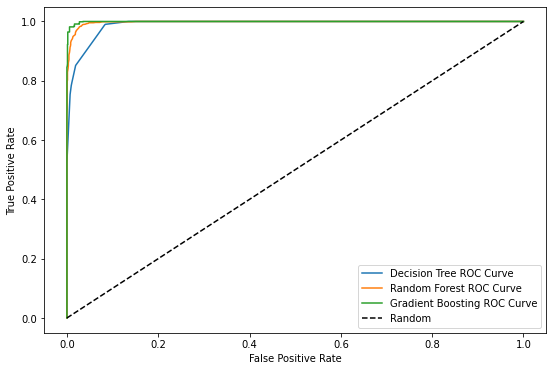

In [451]:
from sklearn.metrics import roc_auc_score, roc_curve

print(dt_clf.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, dt_clf.predict_proba(X_test)[:, 1], pos_label="1")
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1], pos_label="1")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label="1")

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [452]:
auc_dt = roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.990
Random Forest의 AUC: 0.998
Gradient Boosting의 AUC: 0.999


###인사이트

- 데이터 전처리
파생 변수 bmi와 비만 여부 생성
비만 여부는 bmi가 25 이하일 때 'N', 이상일 때 'Y'로 설정
종속변수는 비만 여부, 독립 변수는 이외 신체정보
결측치 확인, 대체 및 제거


- 의사결정나무 생성, 변수 중요도 파악
가장 중요한 변수 3가지: 체중, 신장, 연령대

- 앙상블 모델-그래디언트 부스팅, 랜덤 포레스트 정확도 평가

- 분류모델 평가
정오분류표 평가 결과,
Decision tree 시험용 데이터 세트 정확도:0.941
Random forest 시험용 데이터 세트 정확도:0.976
Gradient boosting 시험용 데이터 세트 정확도:0.988로
그래디언트 부스팅 앙상블 모델의 정확도가 가장 높음을 파악하였음


